In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [193]:
loan=pd.read_json("loan_data.json")
loan.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [194]:
loan.duplicated().sum()

0

In [195]:
loan.isnull().value_counts().sum()

511

In [196]:
loan.shape

(511, 10)

In [197]:
# lets lable encode the cloumns in the dataset
#from sklearn.preprocessing import LabelEncoder
#lm=LabelEncoder()
#loan['Gender']=lm.fit_transform(loan['Gender'])
#loan['Married']=lm.fit_transform(loan['Married'])
#loan['Education']=lm.fit_transform(loan['Education'])
#loan['Self_Employed']=lm.fit_transform(loan['Self_Employed'])
#loan['Property_Area']=lm.fit_transform(loan['Property_Area'])
#loan['Income']=lm.fit_transform(loan['Income'])
#loan['Application_Status']=lm.fit_transform(loan['Application_Status'])

In [198]:
loan.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [199]:
# lets check the visualization of eac cloumns wrt application status
#fig,axes=plt.subplots (4,2,figsize=(12,18))
application_yes=loan[loan['Application_Status']==1]
application_no=loan[loan['Application_Status']==0]
print(application_yes.shape,application_no.shape)

(0, 10) (0, 10)


([<matplotlib.axis.XTick at 0x20dc2b57fd0>,
 [Text(0, 0, 'Application_approved'), Text(1, 0, 'Application_not_approved')])

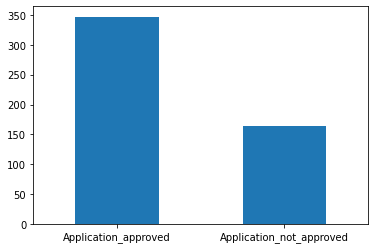

In [200]:
labels=['Application_approved',"Application_not_approved"]
%matplotlib inline
count_application_status=pd.value_counts(loan['Application_Status'])
count_application_status.plot(kind='bar',rot=0)
plt.xticks(range(2),labels)

In [201]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
#dfine dataset
X_1,Y_1=make_classification(n_samples=511,weights=[0.99],flip_y=0)
#summarise the classification
print(Counter(loan))

Counter({'Application_ID': 1, 'Gender': 1, 'Married': 1, 'Dependents': 1, 'Education': 1, 'Self_Employed': 1, 'Credit_History': 1, 'Property_Area': 1, 'Income': 1, 'Application_Status': 1})


In [238]:
undersample=RandomUnderSampler(sampling_strategy='majority')
X_under,Y_under=undersample.fit_resample(X_1,Y_1)
print(Counter(Y_under))

Counter({0: 5, 1: 5})


([<matplotlib.axis.XTick at 0x20dc2b1e9d0>,
 [Text(0, 0, 'Application_approved'), Text(1, 0, 'Application_not_approved')])

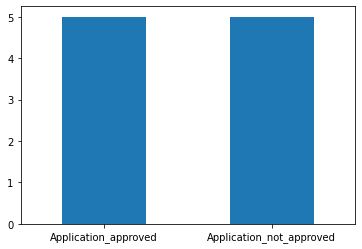

In [239]:
labels=['Application_approved',"Application_not_approved"]
%matplotlib inline
count_application_status=pd.value_counts(Y_under)
count_application_status.plot(kind='bar',rot=0)
plt.xticks(range(2),labels)

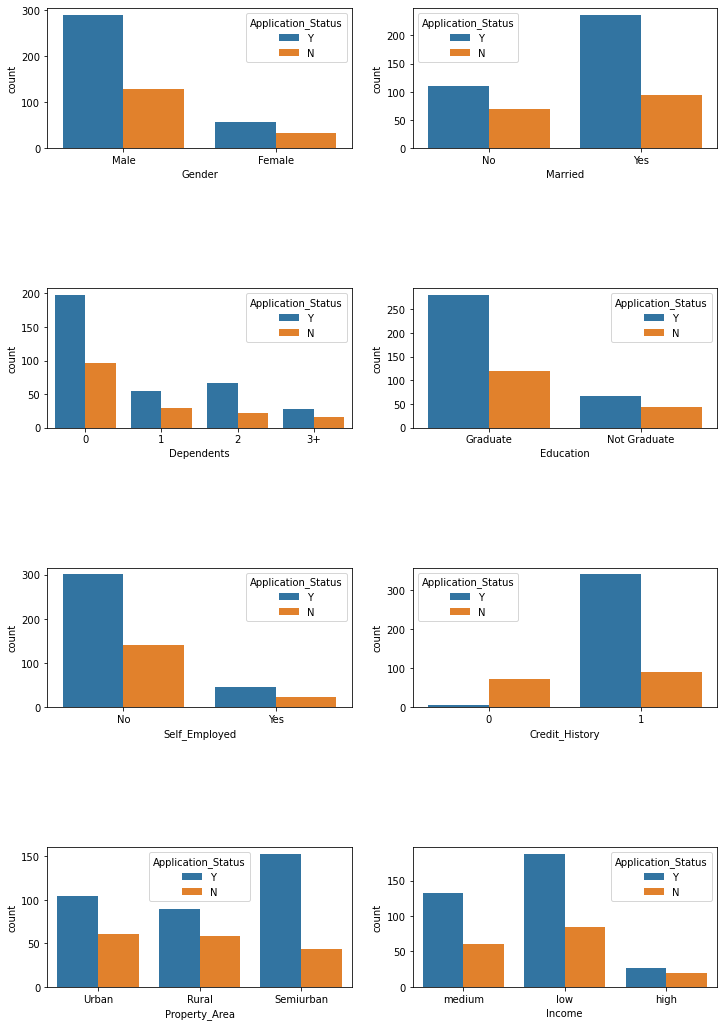

In [204]:
 import seaborn as sns
fig,axes=plt.subplots(4,2,figsize=(12,18))
for id, i in enumerate(loan([['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income']]):
    row,col=id//2,id%2
    sns.countplot(x=i,data=loan,hue='Application_Status',ax=axes[row,col])
    plt.subplots_adjust(hspace=1)


# Ques 1:
. Find % of total applicants for each unique value of dependents.

In [205]:
loan['Dependents'].replace(to_replace='3+',value='3',inplace=True)

In [206]:
unique_dependents=loan.groupby(loan.Dependents)
unique_dependents.count()

,Application_ID,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,,
0,294,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88,88
3,44,44,44,44,44,44,44,44,44


In [207]:
print(round(294/511*100),'%of total applicatants with 0 unique dependents')
print(round(85/511*100),'%of total applicatants with 1 unique dependents')
print(round(88/511*100),'%of total applicatants with 2 unique dependents')
print(round(44/511*100),'%of total applicatants with 3+ unique dependents')


58 %of total applicatants with 0 unique dependents
17 %of total applicatants with 1 unique dependents
17 %of total applicatants with 2 unique dependents
9 %of total applicatants with 3+ unique dependents


# Ques 2:
. Find the %of applications approved for self-employed applicants

In [208]:
loan.groupby(['Self_Employed','Application_Status']).count()


Application_ID  Gender  Married  Dependents  \
Self_Employed Application_Status                                                
No            N                              140     140      140         140   
              Y                              301     301      301         301   
Yes           N                               24      24       24          24   
              Y                               46      46       46          46   

                                  Education  Credit_History  Property_Area  \
Self_Employed Application_Status                                             
No            N                         140             140            140   
              Y                         301             301            301   
Yes           N                          24              24             24   
              Y                          46              46             46   

                                  Income  
Self_Employed Application_Status          
No            N                      140  
              Y                      301  
Yes           N                       24  
              Y                       46

In [209]:
print(round(46/511*100),' % = total applications approved to self_employed Applicants')

9  % = total applications approved to self_employed Applicants


# Ques 3:
What is the % of rejections for married male applicants?

In [210]:
loan.groupby(['Married','Gender','Application_Status']).count()

Application_ID  Dependents  Education  \
Married Gender Application_Status                                          
No      Female N                               26          26         26   
               Y                               40          40         40   
        Male   N                               43          43         43   
               Y                               71          71         71   
Yes     Female N                                8           8          8   
               Y                               17          17         17   
        Male   N                               87          87         87   
               Y                              219         219        219   

                                   Self_Employed  Credit_History  \
Married Gender Application_Status                                  
No      Female N                              26              26   
               Y                              40              40   
        Male   N                              43              43   
               Y                              71              71   
Yes     Female N                               8               8   
               Y                              17              17   
        Male   N                              87              87   
               Y                             219             219   

                                   Property_Area  Income  
Married Gender Application_Status                         
No      Female N                              26      26  
               Y                              40      40  
        Male   N                              43      43  
               Y                              71      71  
Yes     Female N                               8       8  
               Y                              17      17  
        Male   N                              87      87  
               Y                             219     219

In [211]:
print("percentage of rejections for married male applicants",round(87/511*100),"%")

percentage of rejections for married male applicants 17 %


# Ques 4:
Which property area has the maximum approval ratio

In [212]:
loan.groupby(['Property_Area','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

In [213]:
print("property area in Rural approval_ratio",round(90/511*100),"%")
print("property area in Semi Urban approval_ratio",round(153/511*100),"%")
print("property area in Urban approval_ratio",round(104/511*100),"%")

property area in Rural approval_ratio 18 %
property area in Semi Urban approval_ratio 30 %
property area in Urban approval_ratio 20 %


# property area in Semi Urban approval_ratio 30 %

# Ques 5:
Find average number of dependents per income group.

In [214]:
loan1=loan.groupby(['Income','Dependents']).count()

loan1

Application_ID  Gender  Married  Education  Self_Employed  \
Income Dependents                                                              
high   0                       21      21       21         21             21   
       1                       13      13       13         13             13   
       2                        6       6        6          6              6   
       3                        5       5        5          5              5   
low    0                      173     173      173        173            173   
       1                       42      42       42         42             42   
       2                       41      41       41         41             41   
       3                       17      17       17         17             17   
medium 0                      100     100      100        100            100   
       1                       30      30       30         30             30   
       2                       41      41       41         41             41   
       3                       22      22       22         22             22   

                   Credit_History  Property_Area  Application_Status  
Income Dependents                                                     
high   0                       21             21                  21  
       1                       13             13                  13  
       2                        6              6                   6  
       3                        5              5                   5  
low    0                      173            173                 173  
       1                       42             42                  42  
       2                       41             41                  41  
       3                       17             17                  17  
medium 0                      100            100                 100  
       1                       30             30                  30  
       2                       41             41                  41  
       3                       22             22                  22

In [215]:
print("average number of dependents per income group(HIGH)",round(21+13+6+5/511))
print("average number of dependents per income group(LOW)",round(173+42+41+17/511))
print("average number of dependents per income group(MEDIUM)",round(100+30+41+22/511))

average number of dependents per income group(HIGH) 40
average number of dependents per income group(LOW) 256
average number of dependents per income group(MEDIUM) 171


In [216]:
loan.groupby(['Income']).count()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Application_Status
Income,,,,,,,,,
high,45,45,45,45,45,45,45,45,45
low,273,273,273,273,273,273,273,273,273
medium,193,193,193,193,193,193,193,193,193


# Ques 6: 
. Find approval ratio for various combinations of Property_Area and Marrital status

In [217]:
loan.groupby(['Property_Area','Married','Gender']).count()


Application_ID  Dependents  Education  \
Property_Area Married Gender                                          
Rural         No      Female              16          16         16   
                      Male                40          40         40   
              Yes     Female               4           4          4   
                      Male                89          89         89   
Semiurban     No      Female              30          30         30   
                      Male                38          38         38   
              Yes     Female              15          15         15   
                      Male               114         114        114   
Urban         No      Female              20          20         20   
                      Male                36          36         36   
              Yes     Female               6           6          6   
                      Male               103         103        103   

                              Self_Employed  Credit_History  Income  \
Property_Area Married Gender                                          
Rural         No      Female             16              16      16   
                      Male               40              40      40   
              Yes     Female              4               4       4   
                      Male               89              89      89   
Semiurban     No      Female             30              30      30   
                      Male               38              38      38   
              Yes     Female             15              15      15   
                      Male              114             114     114   
Urban         No      Female             20              20      20   
                      Male               36              36      36   
              Yes     Female              6               6       6   
                      Male              103             103     103   

                              Application_Status  
Property_Area Married Gender                      
Rural         No      Female                  16  
                      Male                    40  
              Yes     Female                   4  
                      Male                    89  
Semiurban     No      Female                  30  
                      Male                    38  
              Yes     Female                  15  
                      Male                   114  
Urban         No      Female                  20  
                      Male                    36  
              Yes     Female                   6  
                      Male                   103

In [218]:
print("property area in Rural_male_married approval_ratio",round(89/511*100),"%")
print("property area in Rural_male_unmarried approval_ratio",round(40/511*100),"%")
print("property area in Semi Urban_male_married approval_ratio",round(114/511*100),"%")
print("property area in Semi Urban_male_unmarried approval_ratio",round(38/511*100),"%")
print("property area in Urban_male_married approval_ratio",round(103/511*100),"%")
print("property area in Urban_male_unmarried approval_ratio",round(36/511*100),"%")

print("property area in Rural_female_married approval_ratio",round(4/511*100),"%")
print("property area in Rural_female_unmarried approval_ratio",round(16/511*100),"%")
print("property area in Semi Urban_female_married approval_ratio",round(15/511*100),"%")
print("property area in Semi Urban_female_unmarried approval_ratio",round(30/511*100),"%")
print("property area in Urban_female_married approval_ratio",round(6/511*100),"%")
print("property area in Urban_female_unmarried approval_ratio",round(20/511*100),"%")

property area in Rural_male_married approval_ratio 17 %
property area in Rural_male_unmarried approval_ratio 8 %
property area in Semi Urban_male_married approval_ratio 22 %
property area in Semi Urban_male_unmarried approval_ratio 7 %
property area in Urban_male_married approval_ratio 20 %
property area in Urban_male_unmarried approval_ratio 7 %
property area in Rural_female_married approval_ratio 1 %
property area in Rural_female_unmarried approval_ratio 3 %
property area in Semi Urban_female_married approval_ratio 3 %
property area in Semi Urban_female_unmarried approval_ratio 6 %
property area in Urban_female_married approval_ratio 1 %
property area in Urban_female_unmarried approval_ratio 4 %


In [338]:
print("property area in Rural_married approval_ratio",round(89+4/511*100),"%")
print("property area in Rural_unmarried approval_ratio",round(40+16/511*100),"%")
print("property area in Semi Urban_married approval_ratio",round(114+15/511*100),"%")
print("property area in Semi Urban_unmarried approval_ratio",round(38+30/511*100),"%")
print("property area in Urban_married approval_ratio",round(103+6/511*100),"%")
print("property area in Urban_unmarried approval_ratio",round(36+20/511*100),"%")





property area in Rural_married approval_ratio 90 %
property area in Rural_unmarried approval_ratio 43 %
property area in Semi Urban_married approval_ratio 117 %
property area in Semi Urban_unmarried approval_ratio 44 %
property area in Urban_married approval_ratio 104 %
property area in Urban_unmarried approval_ratio 40 %


In [343]:
from tabulate import tabulate
my_data=[['Rural','Married',93,90],['Rural','Unmarried',56,43],['SemiUrban','Married',129,117],['SemiUrban','UnMarried',68,44],['Urban','Married',109,104],['Urban','UnMarried',56,40]]
head=["property_Area","Marital_Status","Application_Status","Approval_Ratio%"]
print(tabulate(my_data,headers=head,tablefmt='grid'))

+-----------------+------------------+----------------------+-------------------+
| property_Area   | Marital_Status   |   Application_Status |   Approval_Ratio% |
+=================+==================+======================+===================+
| Rural           | Married          |                   93 |                90 |
+-----------------+------------------+----------------------+-------------------+
| Rural           | Unmarried        |                   56 |                43 |
+-----------------+------------------+----------------------+-------------------+
| SemiUrban       | Married          |                  129 |               117 |
+-----------------+------------------+----------------------+-------------------+
| SemiUrban       | UnMarried        |                   68 |                44 |
+-----------------+------------------+----------------------+-------------------+
| Urban           | Married          |                  109 |               104 |
+---------------

# ques 7:
Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

In [219]:
loan.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [220]:
loan.drop(['Application_ID'],axis=1,inplace=True)

In [221]:
loan

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,Male,No,0,Graduate,No,1,Urban,medium,Y
1,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...
506,Female,No,0,Graduate,No,1,Rural,low,Y
507,Male,Yes,3,Graduate,No,1,Rural,medium,Y
508,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [222]:
# convert it into numerical data form
# lets lable encode the cloumns in the dataset
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
loan['Gender']=lm.fit_transform(loan['Gender'])
loan['Married']=lm.fit_transform(loan['Married'])
loan['Education']=lm.fit_transform(loan['Education'])
loan['Self_Employed']=lm.fit_transform(loan['Self_Employed'])
loan['Property_Area']=lm.fit_transform(loan['Property_Area'])
loan['Income']=lm.fit_transform(loan['Income'])
loan['Application_Status']=lm.fit_transform(loan['Application_Status'])

In [223]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


In [242]:
from sklearn.model_selection import train_test_split
X_under=loan.iloc[:,0:8]
Y_under=loan.iloc[:,8]

In [312]:
x_train,x_test,y_train,y_test=train_test_split(X_under,Y_under,test_size=0.33,random_state=10)

In [313]:
# logistice Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [314]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [315]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [316]:
# to find the confusion matrix and accurcay

confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 26  27]
 [  4 112]]


In [317]:
ac(y_test,y_pred)

0.8165680473372781

In [318]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.49      0.63        53
           1       0.81      0.97      0.88       116

    accuracy                           0.82       169
   macro avg       0.84      0.73      0.75       169
weighted avg       0.82      0.82      0.80       169



# SVM MODEL

In [319]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [320]:
clf = SVC(kernel="rbf")

clf.fit(x_train , y_train)
y_pred_svm = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_svm)
train_acc_svm=round(clf.score(x_train, y_train) * 100, 2)
test_acc_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)
print('Train_Accuracy_score= {}',(train_acc_svm))
print("Test_Accuracy Score= {}",(test_acc_svm))

Accuracy = 82.24852071005917
Train_Accuracy_score= {} 80.12
Test_Accuracy Score= {} 82.25


In [321]:
print("Classification report: {}",(classification_report(y_test,y_pred_svm)))

Classification report: {}               precision    recall  f1-score   support

           0       0.90      0.49      0.63        53
           1       0.81      0.97      0.88       116

    accuracy                           0.82       169
   macro avg       0.85      0.73      0.76       169
weighted avg       0.84      0.82      0.80       169



# Desicion Tree

In [322]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree

In [323]:
model_tree=DecisionTreeRegressor(max_depth=3,random_state=10)
model_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [324]:
# use metrics
from sklearn import metrics
y_pred=model_tree.predict(x_test)
y_pred

array([0.85606061, 0.85606061, 0.85606061, 0.71590909, 0.76190476,
       0.71590909, 0.71590909, 0.76190476, 0.85606061, 0.85606061,
       0.71590909, 0.71590909, 0.71590909, 0.71590909, 0.85606061,
       0.76190476, 0.71590909, 0.85606061, 0.71590909, 0.85606061,
       0.28571429, 0.85606061, 0.71590909, 0.71590909, 0.71590909,
       0.85606061, 0.        , 0.71590909, 0.        , 0.71590909,
       0.71590909, 0.76190476, 0.76190476, 0.85606061, 0.76190476,
       0.76190476, 0.85606061, 0.71590909, 0.        , 0.71590909,
       0.85606061, 0.85606061, 0.85606061, 0.        , 0.71590909,
       0.85606061, 0.71590909, 0.28571429, 0.28571429, 0.85606061,
       0.76190476, 0.85606061, 0.        , 0.85606061, 0.        ,
       0.71590909, 0.28571429, 0.        , 0.71590909, 0.71590909,
       0.71590909, 0.71590909, 0.        , 0.85606061, 0.85606061,
       0.71590909, 0.85606061, 0.85606061, 0.        , 0.71590909,
       0.71590909, 0.        , 0.        , 0.85606061, 0.76190

[Text(0.4583333333333333, 0.875, 'X[5] <= 0.5\nsquared_error = 0.219\nsamples = 342\nvalue = 0.675'),
 Text(0.25, 0.625, 'X[6] <= 1.5\nsquared_error = 0.072\nsamples = 51\nvalue = 0.078'),
 Text(0.16666666666666666, 0.375, 'X[6] <= 0.5\nsquared_error = 0.109\nsamples = 32\nvalue = 0.125'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.0\nsamples = 18\nvalue = 0.0'),
 Text(0.25, 0.125, 'squared_error = 0.204\nsamples = 14\nvalue = 0.286'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.0\nsamples = 19\nvalue = 0.0'),
 Text(0.6666666666666666, 0.625, 'X[1] <= 0.5\nsquared_error = 0.172\nsamples = 291\nvalue = 0.78'),
 Text(0.5, 0.375, 'X[7] <= 0.5\nsquared_error = 0.215\nsamples = 96\nvalue = 0.688'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.234\nsamples = 8\nvalue = 0.375'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.203\nsamples = 88\nvalue = 0.716'),
 Text(0.8333333333333334, 0.375, 'X[6] <= 1.5\nsquared_error = 0.144\nsamples = 195\nvalue = 0.826'),
 T

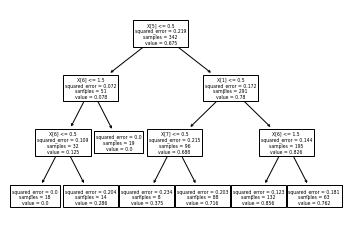

In [325]:
# lets plot a tree
plot_tree(model_tree)

In [326]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [327]:
importance= model1.feature_importances_
importance


array([0.        , 0.0456043 , 0.01061401, 0.        , 0.00528871,
       0.79361538, 0.09618984, 0.04868776])

In [328]:
y_pred=model1.predict(x_test)
pd.Series(y_pred).value_counts()

1    140
0     29
dtype: int64

In [332]:
#check for accurcy
ac=accuracy_score(y_pred,y_test)
ac

0.8224852071005917

In [333]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print (classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.49      0.90      0.63        29
           1       0.97      0.81      0.88       140

    accuracy                           0.82       169
   macro avg       0.73      0.85      0.76       169
weighted avg       0.89      0.82      0.84       169



# Random Forest

In [334]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=60,random_state=25)
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_rf=rf.predict(x_test)


In [335]:
print(confusion_matrix(y_test,y_pred_rf))
acc=accuracy_score(y_test,y_pred)
train_acc_rf=round(rf.score(x_train, y_train) * 100, 2)
test_acc_rf=round(accuracy_score(y_test,y_pred_rf)*100,2)
print('total accuracy={}',(acc))
print('Train_Accuracy_score= {}',(train_acc_rf))
print("Test_Accuracy Score= {}",(test_acc_rf))


[[31 22]
 [20 96]]
total accuracy={} 0.8224852071005917
Train_Accuracy_score= {} 89.47
Test_Accuracy Score= {} 75.15


In [336]:

print("Classification report: {}",(classification_report(y_test,y_pred_rf)))

Classification report: {}               precision    recall  f1-score   support

           0       0.61      0.58      0.60        53
           1       0.81      0.83      0.82       116

    accuracy                           0.75       169
   macro avg       0.71      0.71      0.71       169
weighted avg       0.75      0.75      0.75       169



In [ ]:
# Decision Tree And SVM  model has high Accuracy